# Multiple Linear Regression Analysis

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("~/library/data/processed/borough-unemployment-and-business-data.csv")
df.drop("Unnamed: 0", axis=1,inplace=True)

In [4]:
df.drop("area", axis=1,inplace=True)
df.drop("year", axis=1,inplace=True)
df.drop('unemployment_rate', axis=1, inplace=True)
df.head()

,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate
0,455.0,54.5,54000,0.45,33.2,22.734367,8.6,13.7,16.3,14.3
1,1635.0,57.7,147000,0.62,57.3,9.944418,3.7,10.9,9.3,7.5
2,555.0,58.7,78000,0.53,29.6,10.870386,4.8,19.0,19.2,17.2
3,1085.0,56.7,115000,0.53,33.8,14.681718,8.2,14.8,11.4,9.2
4,990.0,62.7,119000,0.61,47.1,10.269752,5.4,17.5,12.8,10.5


# Final Results

The variation in registered youth unemployment rates in our sample can be better explained by a model based on qualification parameters than job availability parameters. Precisely, a model based on the rates of economically active people with qualifications higher or equal to NVQ4, rates of economically active people with qualifications equal to NVQ3, and rates of economically active people with no qualifications, yields an adjusted R2 coefficient of determination of R2=0.873 on the test set and an overall adjusted R2 coefficient of determination for these independent variables of youth unemployment rate of R2=0.862 can be found. Both of these scores are lower for the job availability model. The model based on the 3 year survival rate of businesses and job density, yields only an adjusted R2 coefficient of determination of 0.808 on the test set and an overall adjusted R2 coefficient of determination of R2=0.787. The better scores of qualifications over job availability seem to be best explained by the most significant variables in the respective models. The no qualifications rate, which seem to be most significant in the qualifications model, has a higher correlation coefficient with youth unemployment (|0.53|) than the 3 year survival rate (|0.43|), while the other independent variables have much lower correlation coefficients with the youth unemploymen rate. 

Limitations:
There are some relevant limitations to our analysis. First of all, autocorrelation in residuals cannot be ruled out. The Durban-Watson-Test indicates that it is quite likely that there is positive autocorrelation in residuals in the two regression analyses that were performed on the total sets (with y, X and y, Z). Our R2-scores should hence be read with caution. However, for the regression analysis on the test sets seems to be more reliable in this respect as the Durban-Watson-Test scores more approximate 2.
Secondly, can certainly not guarantee that we included all relevant variables that determine job availability or qualification levels. Hence, an different analysis using other parameters might come to a different conclusion concerning which of the two influences youth unemployment more.  

In [90]:
X=df.drop(['youth_unemployment_rate'],axis=1) #geographical factors set
X.drop('NVQ4_rate', axis=1, inplace=True)
X.drop('no_qualif_rate', axis=1, inplace=True)
X.drop('NVQ3_rate', axis=1, inplace=True)
X.drop('NVQ2_rate', axis=1, inplace=True)
X.drop('NVQ1_rate', axis=1, inplace=True)
#X.drop('3_year_survival_number', axis=1, inplace=True) #can be dropped optionally
X.drop('number_of_jobs', axis=1, inplace=True) #to prevent multicollinearity with job density
X.drop('3_year_survival_number', axis=1, inplace=True) #to prevent multicollinearity with job density

y=df.youth_unemployment_rate #youth unemployment set

Z=df.drop(['youth_unemployment_rate'],axis=1)
Z.drop('3_year_survival_number', axis=1, inplace=True) #qualifications factors set
Z.drop('3_year_survival_rate', axis=1, inplace=True)
Z.drop('number_of_jobs', axis=1, inplace=True)
Z.drop('job_density', axis=1, inplace=True)
Z.drop('NVQ2_rate', axis=1, inplace=True) #to prevent multicollinearity with NVQ4
Z.drop('NVQ1_rate', axis=1, inplace=True) #to prevent multicollinearity with NVQ4

In [91]:
X_train, X_test, y_train, y_test, Z_train, Z_test = train_test_split(X, y, Z, test_size = 0.3, random_state = 0)

In [92]:
#jobsupply
lr = LinearRegression(fit_intercept=False)
model1=lr.fit(X_train, y_train)
ypred1 = model1.predict(X_test)

In [94]:
regressor_OLS = sm.OLS(endog = y_test, exog = ypred1).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.813
Model:                                 OLS   Adj. R-squared:                  0.808
Method:                      Least Squares   F-statistic:                     165.0
Date:                     Fri, 27 Dec 2019   Prob (F-statistic):           2.11e-15
Time:                             09:33:06   Log-Likelihood:                -113.66
No. Observations:                       39   AIC:                             229.3
Df Residuals:                           38   BIC:                             231.0
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9785      0.076     12.846      0.000       0.824       1.133
==============================================================================
Omnibus:                        3.065   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.852
Skew:                           0.620   Prob(JB):                        0.240
Kurtosis:                       2.534   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.790
Model:                                 OLS   Adj. R-squared:                  0.787
Method:                      Least Squares   F-statistic:                     237.4
Date:                     Fri, 27 Dec 2019   Prob (F-statistic):           1.84e-43
Time:                             09:33:11   Log-Likelihood:                -383.25
No. Observations:                      128   AIC:                             770.5
Df Residuals:                          126   BIC:                             776.2
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
3_year_survival_rate     0.1644      0.011     14.716      0.000       0.142       0.187
job_density             -0.3490      0.583     -0.599      0.550      -1.502       0.804
==============================================================================
Omnibus:                        8.203   Durbin-Watson:                   1.155
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.405
Skew:                           0.592   Prob(JB):                       0.0150
Kurtosis:                       2.585   Cond. No.                         79.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
#qualifications
lr = LinearRegression(fit_intercept=False)
model2=lr.fit(Z_train, y_train)
ypred2 = model2.predict(Z_test)

In [97]:
regressor_OLS = sm.OLS(endog = y_test , exog = ypred2).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.876
Model:                                 OLS   Adj. R-squared:                  0.873
Method:                      Least Squares   F-statistic:                     269.5
Date:                     Fri, 27 Dec 2019   Prob (F-statistic):           7.62e-19
Time:                             09:33:27   Log-Likelihood:                -105.56
No. Observations:                       39   AIC:                             213.1
Df Residuals:                           38   BIC:                             214.8
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9893      0.060     16.418      0.000       0.867       1.111
==============================================================================
Omnibus:                        7.080   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                5.749
Skew:                           0.783   Prob(JB):                       0.0564
Kurtosis:                       4.042   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
regressor_OLS = sm.OLS(endog = y, exog = Z).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.866
Model:                                 OLS   Adj. R-squared:                  0.862
Method:                      Least Squares   F-statistic:                     268.4
Date:                     Fri, 27 Dec 2019   Prob (F-statistic):           2.78e-54
Time:                             09:34:05   Log-Likelihood:                -354.76
No. Observations:                      128   AIC:                             715.5
Df Residuals:                          125   BIC:                             724.1
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
NVQ4_rate          0.0481      0.015      3.215      0.002       0.018       0.078
no_qualif_rate     1.3649      0.150      9.105      0.000       1.068       1.662
NVQ3_rate         -0.0129      0.070     -0.183      0.855      -0.152       0.126
==============================================================================
Omnibus:                        7.281   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.026
Skew:                           0.562   Prob(JB):                       0.0298
Kurtosis:                       3.228   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Preliminary Multiple Linear Regression Model
- test the fit of geographical factors vs. qualifications to predict youth unemployment 

In [68]:
X=df.drop(['youth_unemployment_rate'],axis=1) #geographical factors set
X.drop('NVQ4_rate', axis=1, inplace=True)
X.drop('no_qualif_rate', axis=1, inplace=True)
X.drop('NVQ3_rate', axis=1, inplace=True)
X.drop('NVQ2_rate', axis=1, inplace=True)
X.drop('NVQ1_rate', axis=1, inplace=True)

y=df.youth_unemployment_rate #youth unemployment set

Z=df.drop(['youth_unemployment_rate'],axis=1) #qualifications factors set
Z.drop('3_year_survival_number', axis=1, inplace=True) 
Z.drop('3_year_survival_rate', axis=1, inplace=True)
Z.drop('number_of_jobs', axis=1, inplace=True)
Z.drop('job_density', axis=1, inplace=True)

X_train, X_test, y_train, y_test, Z_train, Z_test = train_test_split(X, y, Z, test_size = 0.3, random_state = 0)

In [69]:
lr = LinearRegression(fit_intercept=False)
model1=lr.fit(X_train, y_train)
ypred1 = model1.predict(X_test)
#metrics.r2_score(y_test,ypred1)

In [70]:
regressor_OLS = sm.OLS(endog = y_test, exog = ypred1).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.823
Model:                                 OLS   Adj. R-squared:                  0.819
Method:                      Least Squares   F-statistic:                     176.9
Date:                     Fri, 27 Dec 2019   Prob (F-statistic):           7.12e-16
Time:                             09:12:53   Log-Likelihood:                -112.55
No. Observations:                       39   AIC:                             227.1
Df Residuals:                           38   BIC:                             228.8
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9695      0.073     13.300      0.000       0.822       1.117
==============================================================================
Omnibus:                        2.778   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.584
Skew:                           0.586   Prob(JB):                        0.275
Kurtosis:                       2.534   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.800
Model:                                 OLS   Adj. R-squared:                  0.795
Method:                      Least Squares   F-statistic:                     166.8
Date:                     Fri, 27 Dec 2019   Prob (F-statistic):           1.58e-43
Time:                             09:13:25   Log-Likelihood:                -380.16
No. Observations:                      128   AIC:                             766.3
Df Residuals:                          125   BIC:                             774.9
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
3_year_survival_number    -0.0024      0.001     -2.486      0.014      -0.004      -0.000
3_year_survival_rate       0.1920      0.016     12.309      0.000       0.161       0.223
job_density                1.4054      0.908      1.548      0.124      -0.391       3.202
==============================================================================
Omnibus:                        5.734   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.315
Skew:                           0.434   Prob(JB):                       0.0701
Kurtosis:                       2.506   Cond. No.                     3.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
lr = LinearRegression(fit_intercept=False)
model2=lr.fit(Z_train, y_train)
ypred2 = model2.predict(Z_test)
#metrics.r2_score(y_test,ypred2)
#looks like both can explain fairly little of the variation (probably unemployment_rate would explain more variation than these combined factors)
#but qualifications seem to be able to explain slightly more than geographcal factors
#might be prone to huge selection bias of factors...

In [73]:
#lr.fit(Z, y).score(Z, y) #issue!!!

In [74]:
regressor_OLS = sm.OLS(endog = y_test , exog = ypred2).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.882
Model:                                 OLS   Adj. R-squared:                  0.879
Method:                      Least Squares   F-statistic:                     284.2
Date:                     Fri, 27 Dec 2019   Prob (F-statistic):           3.14e-19
Time:                             09:15:13   Log-Likelihood:                -104.66
No. Observations:                       39   AIC:                             211.3
Df Residuals:                           38   BIC:                             213.0
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9913      0.059     16.857      0.000       0.872       1.110
==============================================================================
Omnibus:                        2.458   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                1.372
Skew:                           0.350   Prob(JB):                        0.504
Kurtosis:                       3.594   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
regressor_OLS = sm.OLS(endog = y , exog = Z).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.873
Model:                                 OLS   Adj. R-squared:                  0.867
Method:                      Least Squares   F-statistic:                     168.6
Date:                     Fri, 27 Dec 2019   Prob (F-statistic):           2.77e-53
Time:                             09:15:44   Log-Likelihood:                -351.32
No. Observations:                      128   AIC:                             712.6
Df Residuals:                          123   BIC:                             726.9
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
NVQ4_rate          0.0601      0.016      3.743      0.000       0.028       0.092
no_qualif_rate     1.2303      0.161      7.636      0.000       0.911       1.549
NVQ3_rate         -0.2087      0.128     -1.636      0.104      -0.461       0.044
NVQ2_rate         -0.0282      0.168     -0.168      0.867      -0.361       0.305
NVQ1_rate          0.3748      0.183      2.050      0.043       0.013       0.737
==============================================================================
Omnibus:                        4.376   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.922
Skew:                           0.418   Prob(JB):                        0.141
Kurtosis:                       3.190   Cond. No.                         39.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Backward elimination of insignificant independent variables

In [76]:
#use backward elimination in case p-values too high
#e.g. NVQ2-rate seems to be highly likely to be found under the H0 (they cannot predict youth unemployment)
Z_opt = Z.drop('NVQ2_rate', axis=1)
regressor_OLS = sm.OLS(endog = y, exog = Z_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.873
Model:                                 OLS   Adj. R-squared:                  0.869
Method:                      Least Squares   F-statistic:                     212.4
Date:                     Fri, 27 Dec 2019   Prob (F-statistic):           1.81e-54
Time:                             09:16:18   Log-Likelihood:                -351.33
No. Observations:                      128   AIC:                             710.7
Df Residuals:                          124   BIC:                             722.1
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
NVQ4_rate          0.0608      0.015      3.946      0.000       0.030       0.091
no_qualif_rate     1.2241      0.156      7.840      0.000       0.915       1.533
NVQ3_rate         -0.2207      0.105     -2.101      0.038      -0.429      -0.013
NVQ1_rate          0.3543      0.136      2.611      0.010       0.086       0.623
==============================================================================
Omnibus:                        4.360   Durbin-Watson:                   1.050
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                3.921
Skew:                           0.419   Prob(JB):                        0.141
Kurtosis:                       3.178   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Testing the assumptions for a linear regression

Verifying assumptions:
1. Dependent and Independent variable must show a linear relationship
    1. check visually with pair plot
    2. if not, correct with allowing for polinomial regression line
2. No autocorrelation in residuals (difference btw. outcome and predicted…)
    1. Look at Durbin-Watson-Test in stats models summary: if 2 —> good
    2. if +/- —> centre independent variable by subtracting mean in lagged column
3. No Heteroskedacity (standard error along x axis is non-constant)
    1. check plot of residuals vs. fitted values (can also roughly estimate from the pair plot)
    2. if deviation from regression line increases over x  —> non-linear transformation of dependent variable
4. No Multicollinearity (= all predictor variables should be sufficiently independent from each other, otherwise p- and coefficient values cannot be trusted)
    1. check heatmap for correlation or calculate VIF
    2. if one variable with high multicollinearity —> remove it if you can (just don’t use it)
    3. (might be the case for number of jobs & job density)
5. Residuals must be normally distributed
    1. check histogram of residuals
    
reference: https://github.com/fahadanwar10/LinearRegression/blob/master/media-sales-linear-regression-verify-assumptions.ipynb

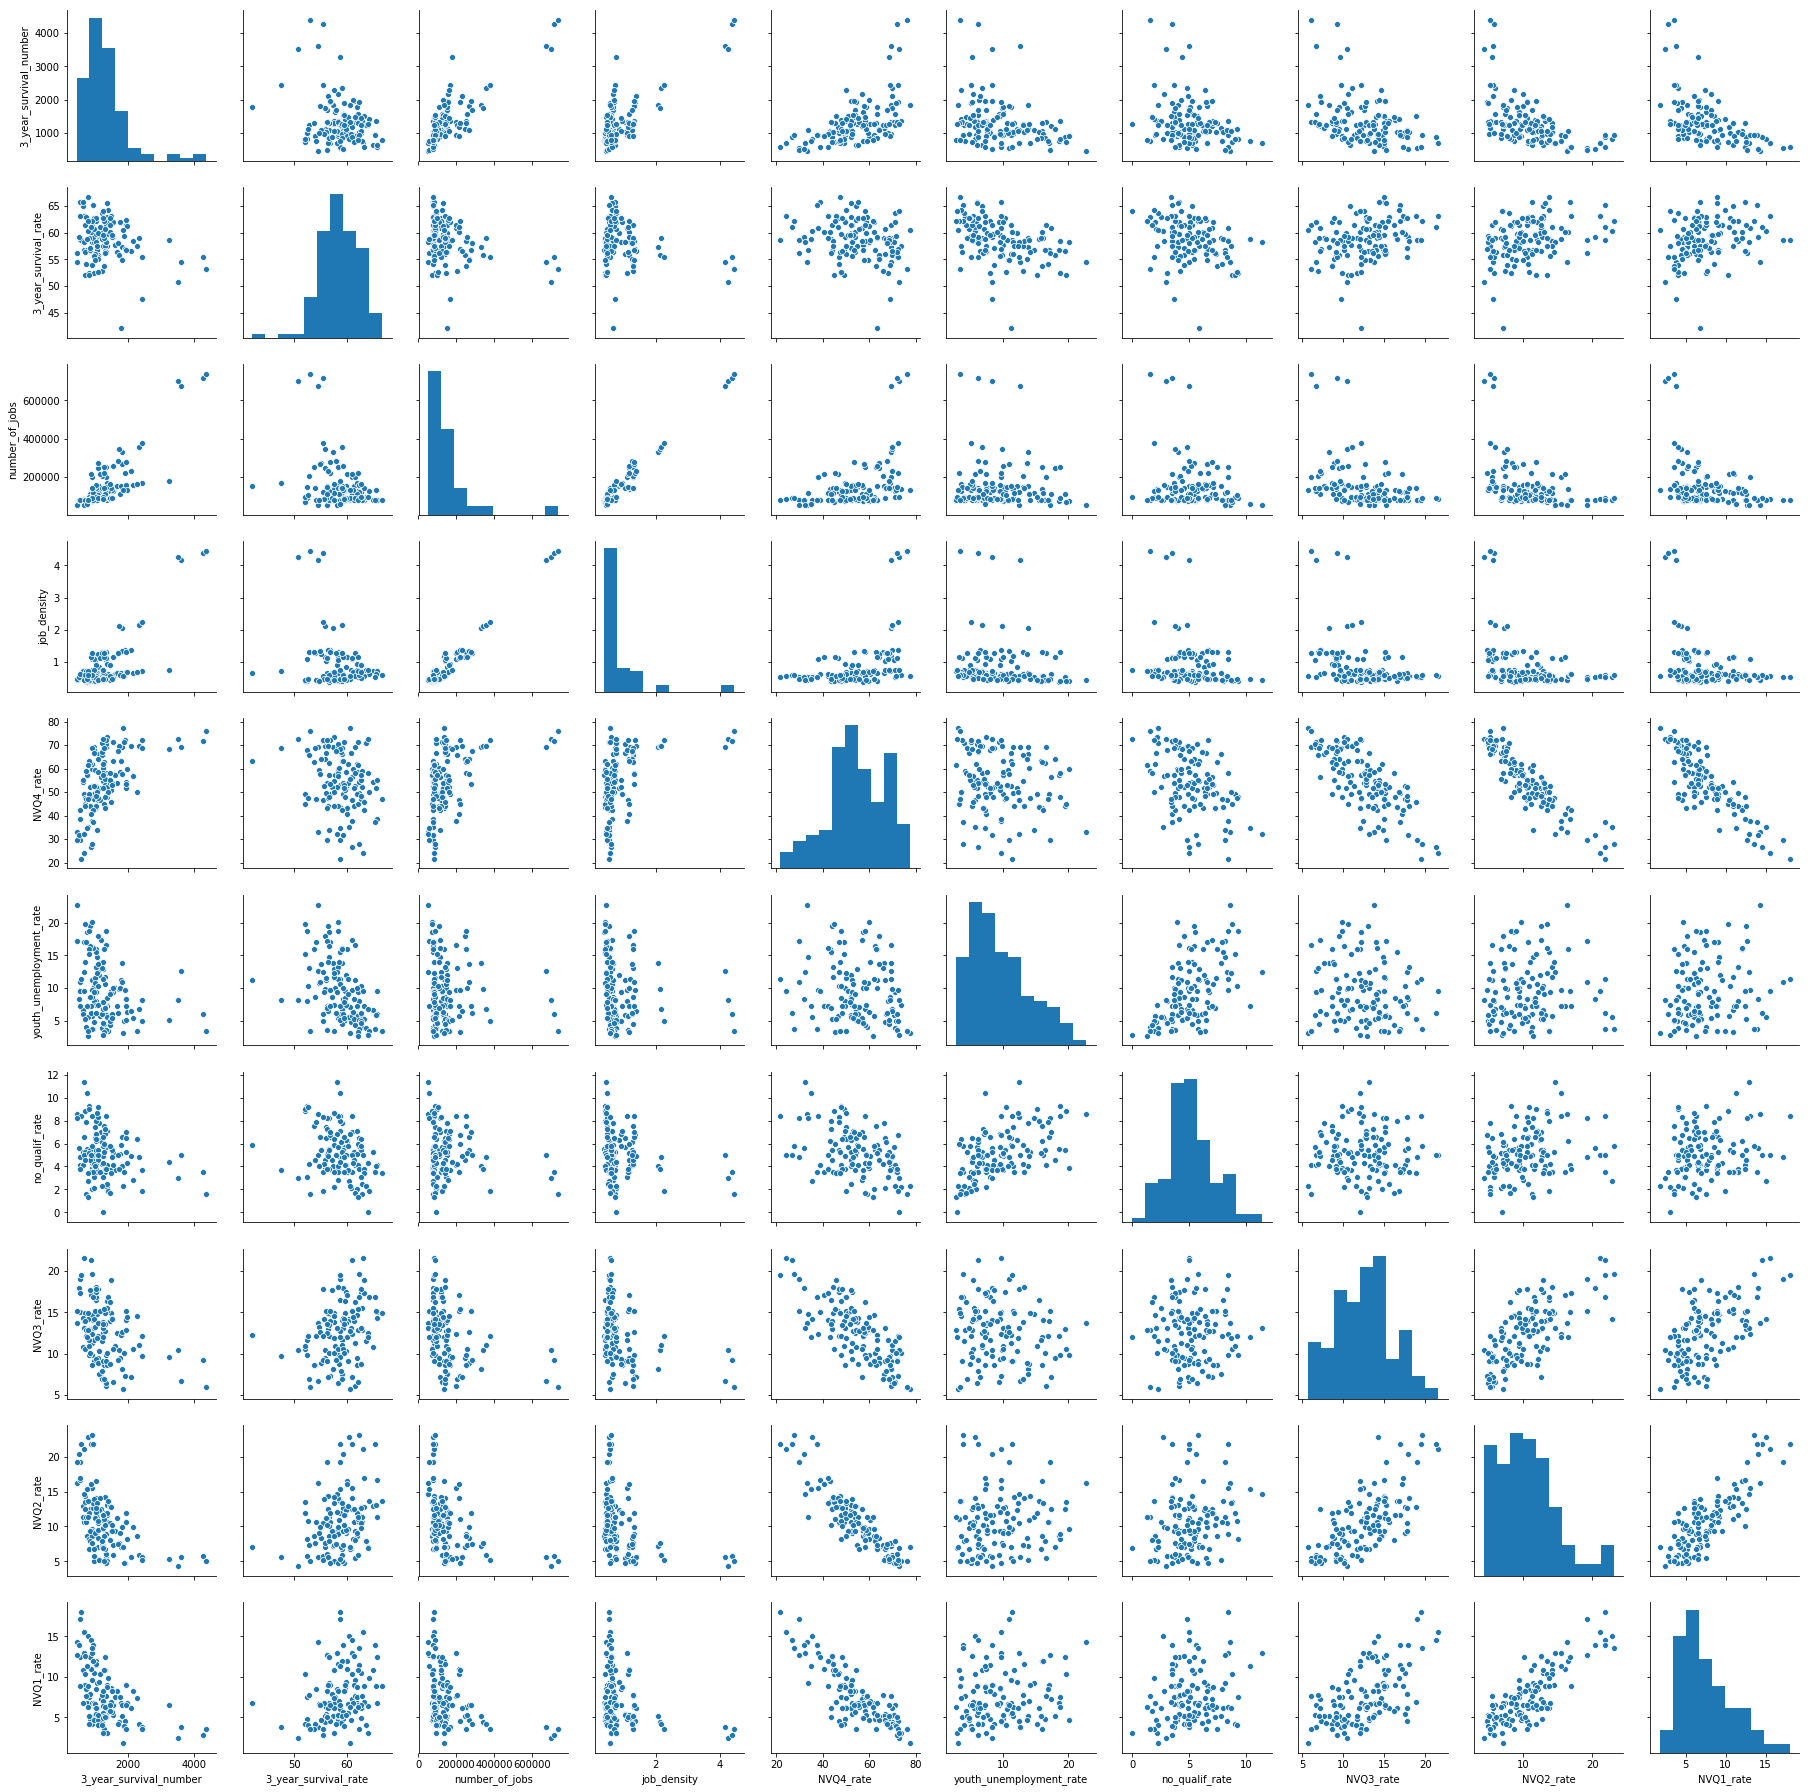

In [14]:
#1 is the relationship linear?
sns.pairplot(data=df)
## --> 3_year_survival_number, number_of_jobs, job_density might be not entirely linearly correlated, but mainly due to quite recognisable outliers

In [28]:
#probably not necessary
from sklearn.preprocessing import PolynomialFeatures 
   
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
   
poly.fit(X_poly, y) 
X_poly = sm.add_constant(X_poly)
results = sm.OLS(y,X_poly).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.577
Model:                                 OLS   Adj. R-squared:                  0.524
Method:                      Least Squares   F-statistic:                     11.00
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):           2.07e-15
Time:                             18:28:49   Log-Likelihood:                -320.53
No. Observations:                      128   AIC:                             671.1
Df Residuals:                          113   BIC:                             713.8
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3059     55.762      0.472      0.638     -84.168     136.780
x1            -0.0478      0.018     -2.716      0.008      -0.083      -0.013
x2             0.9188      1.791      0.513      0.609      -2.629       4.467
x3             0.0006      0.000      1.919      0.058   -2.01e-05       0.001
x4           -90.1539     42.678     -2.112      0.037    -174.706      -5.602
x5          2.148e-06   1.38e-06      1.560      0.122    -5.8e-07    4.88e-06
x6             0.0006      0.000      2.207      0.029    6.47e-05       0.001
x7         -7.277e-09   4.96e-08     -0.147      0.884   -1.06e-07     9.1e-08
x8            -0.0012      0.007     -0.176      0.861      -0.015       0.012
x9            -0.0181      0.015     -1.238      0.218      -0.047       0.011
x10        -8.055e-06   5.18e-06     -1.555      0.123   -1.83e-05    2.21e-06
x11            1.2006      0.711      1.689      0.094      -0.208       2.609
x12        -7.757e-10   3.86e-10     -2.010      0.047   -1.54e-09    -1.1e-11
x13            0.0002      0.000      1.720      0.088   -2.77e-05       0.000
x14           -7.5272      8.956     -0.840      0.402     -25.271      10.216
==============================================================================
Omnibus:                        8.121   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.850
Skew:                           0.579   Prob(JB):                       0.0197
Kurtosis:                       3.359   Cond. No.                     1.96e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#2 is the Durbin-Watson-Test=2?
 #check the
regressor_OLS.summary() #for (y,X) and (y,Z)
## --> the Durbin-Watson-Test is around 2 for model regressions but smaller than 2 for both general regressions, so there might be positive autocorrelation in residuals...

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.830
Model:                                 OLS   Adj. R-squared:                  0.825
Method:                      Least Squares   F-statistic:                     151.8
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):           8.80e-47
Time:                             18:32:13   Log-Likelihood:                -369.65
No. Observations:                      128   AIC:                             747.3
Df Residuals:                          124   BIC:                             758.7
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
3_year_survival_number    -0.0055      0.001     -4.937      0.000      -0.008      -0.003
3_year_survival_rate       0.2129      0.015     14.103      0.000       0.183       0.243
number_of_jobs          7.708e-05   1.64e-05      4.703      0.000    4.46e-05       0.000
job_density               -8.8071      2.328     -3.783      0.000     -13.416      -4.199
==============================================================================
Omnibus:                        4.296   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.232
Skew:                           0.443   Prob(JB):                        0.121
Kurtosis:                       2.910   Cond. No.                     1.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

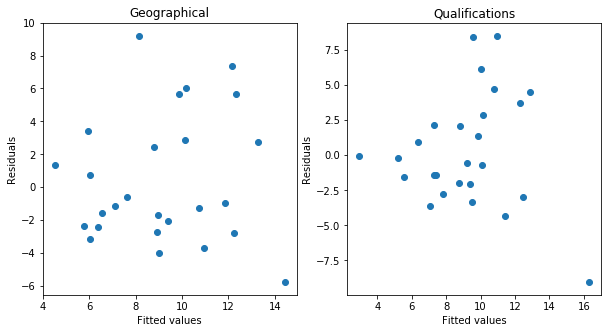

In [15]:
#3 Is there a funnel like shape?
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Geographical")
plt.scatter(ypred1, (y_test-ypred1))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.subplot(1,2,2)
plt.title("Qualifications")
plt.scatter(ypred2, (y_test-ypred2))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
#does not look much like a funnel like shape in both cases, but very dispersed residuals, maybe slight funnel shape in qualifications

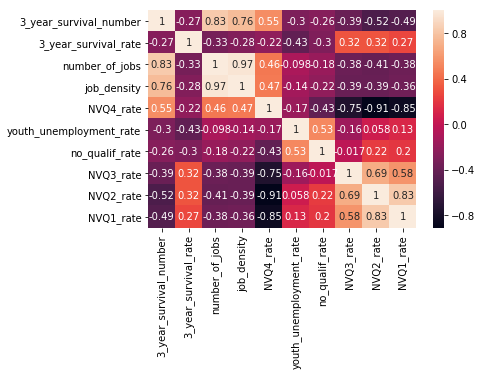

In [16]:
#4 Is one of the predictor variables highly correlated with another one?
sns.heatmap(df.corr(),annot=True)
#there is a high correlation btw. number of jobs and job density --> drop number of jobs (resolves also high correlation with survival rate of businesses)
#and btw. NVQ2 and NVQ1 as well as NVQ4, but NVQ2 should be dropped anyways due to low significance

Text(0.5, 0, 'Residuals')

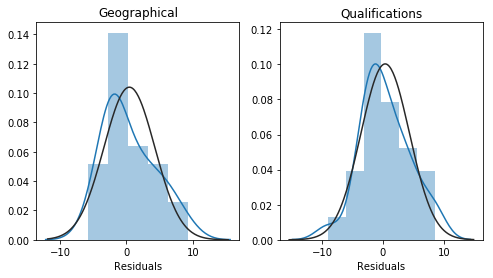

In [18]:
#5 Are the residuals normally distributed?
plt.subplots(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Geographical")
sns.distplot(y_test-ypred1 , fit=norm);
plt.xlabel('Residuals')

plt.subplot(1,2,2)
plt.title("Qualifications")
sns.distplot(y_test-ypred2 , fit=norm);
plt.xlabel('Residuals')
#both slightly deviate from normal distribution, but maybe not too significantly?

# Visualisations

In [8]:
df_final = df.drop('number_of_jobs', axis=1) #to prevent multicollinearity with job density
df_final.drop('3_year_survival_number', axis=1, inplace=True)
df_final.drop('NVQ2_rate', axis=1, inplace=True) #to prevent multicollinearity with NVQ4
df_final.drop('NVQ1_rate', axis=1, inplace=True) #to prevent multicollinearity with NVQ4
df_final = df_final[['youth_unemployment_rate', '3_year_survival_rate', 'job_density', 'NVQ4_rate', 'NVQ3_rate', 'no_qualif_rate']]

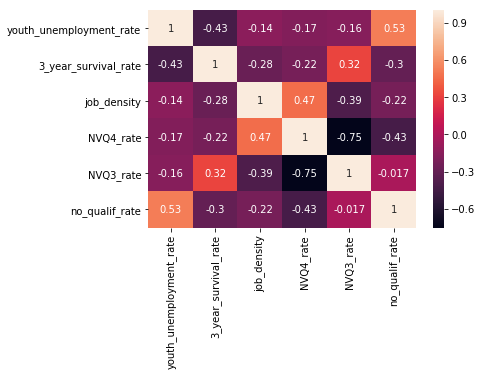

In [9]:
sns.heatmap(df_final.corr(),annot=True)

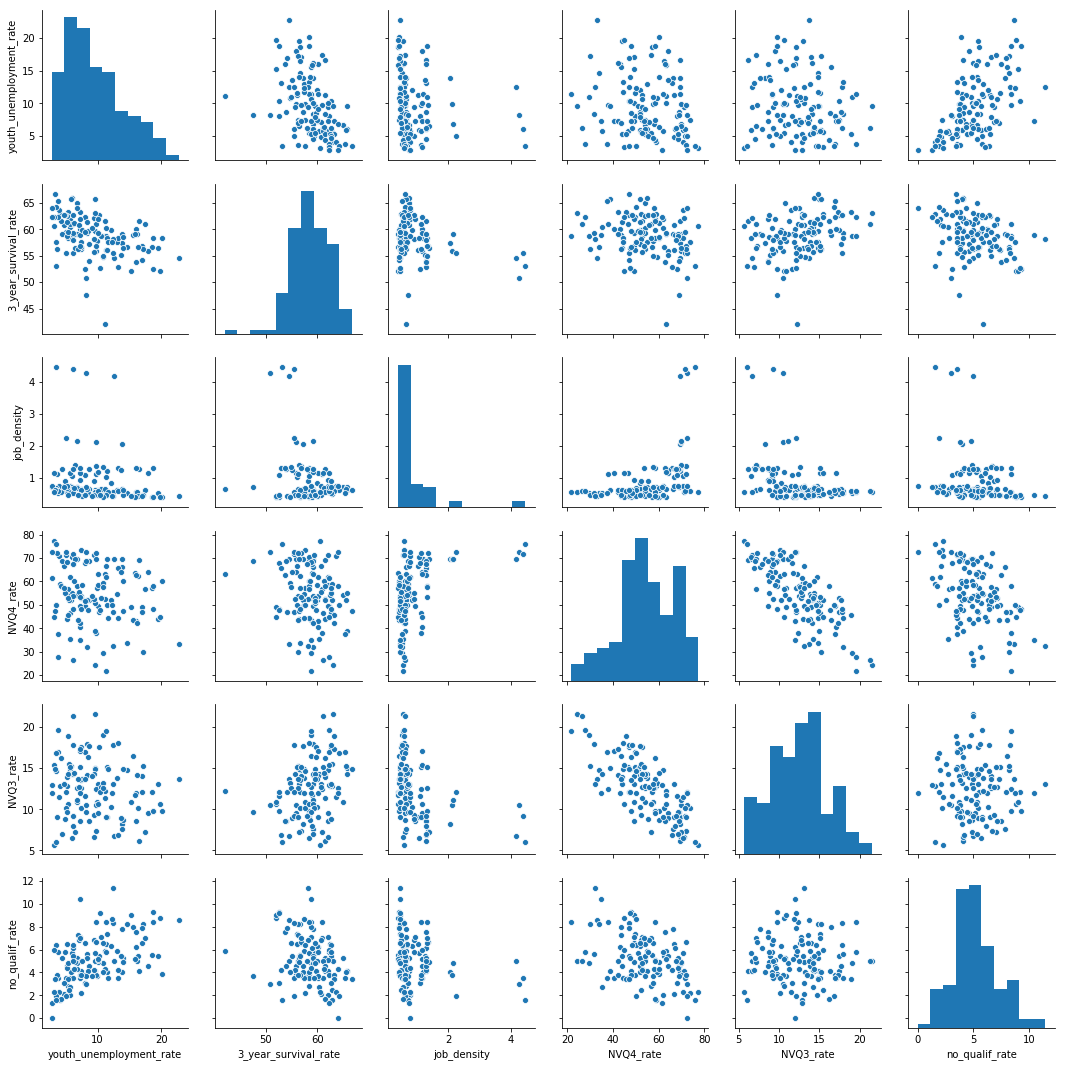

In [10]:
sns.pairplot(data=df_final)